<a href="https://colab.research.google.com/github/cod3astro/kaggle_ML_competition/blob/main/kaggle_introvert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('train.csv', index_col='id')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


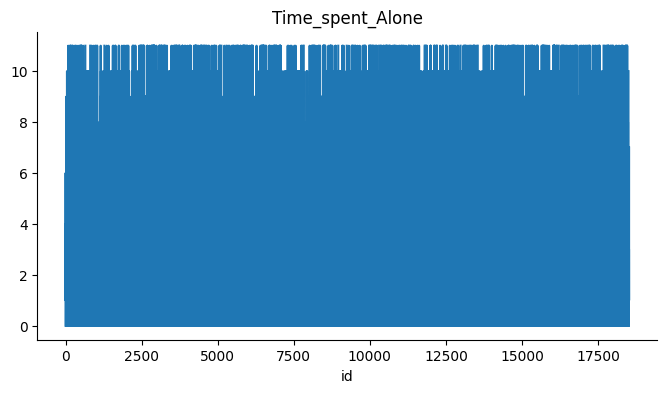

In [7]:
# @title Time_spent_Alone

from matplotlib import pyplot as plt
df['Time_spent_Alone'].plot(kind='line', figsize=(8, 4), title='Time_spent_Alone')
plt.gca().spines[['top', 'right']].set_visible(False)

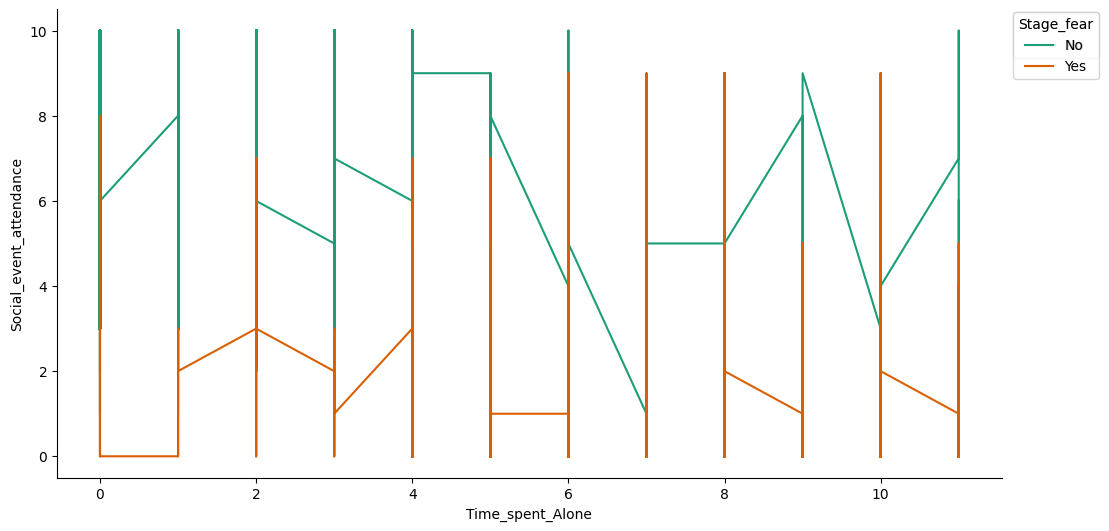

In [6]:
# @title Time_spent_Alone vs Social_event_attendance

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time_spent_Alone']
  ys = series['Social_event_attendance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Time_spent_Alone', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Stage_fear')):
  _plot_series(series, series_name, i)
  fig.legend(title='Stage_fear', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time_spent_Alone')
_ = plt.ylabel('Social_event_attendance')

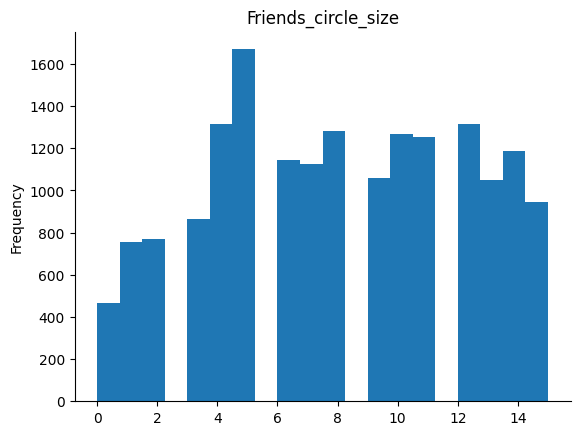

In [3]:
# @title Friends_circle_size

from matplotlib import pyplot as plt
df['Friends_circle_size'].plot(kind='hist', bins=20, title='Friends_circle_size')
plt.gca().spines[['top', 'right',]].set_visible(False)

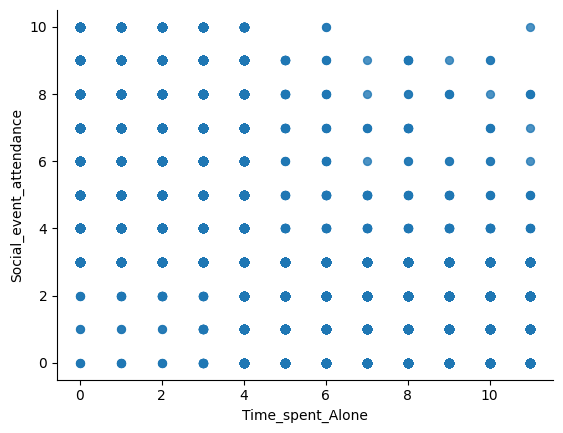

In [4]:
# @title Time_spent_Alone vs Social_event_attendance

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Time_spent_Alone', y='Social_event_attendance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

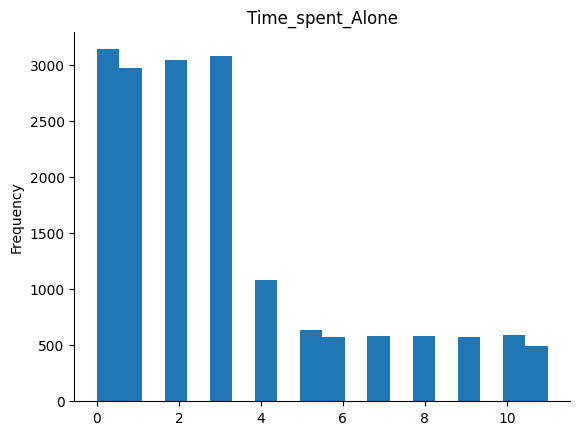

In [5]:
# @title Time_spent_Alone

from matplotlib import pyplot as plt
df['Time_spent_Alone'].plot(kind='hist', bins=20, title='Time_spent_Alone')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
df.shape

(18524, 8)

In [10]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.3+ MB


In [13]:
df.isnull().sum()

,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0
